# GOAL : predict ladder score Based on Happiness Index

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>### Read data into a DataFrame

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('world_happiness.csv'); data

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>### Initial information

In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


Country name                    149
Regional indicator               10
Ladder score                    147
Logged GDP per capita           148
Social support                  119
Healthy life expectancy         135
Freedom to make life choices    126
Generosity                      130
Perceptions of corruption       130
dtype: int64


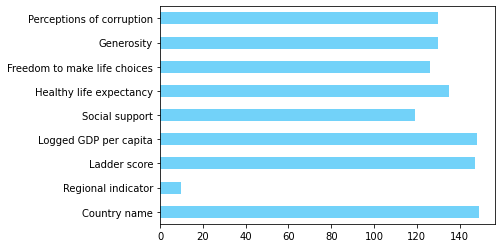

In [3]:
data.nunique().plot(kind='barh',color='#72d2f9')
print(data.nunique())

In [4]:
data_type = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [5]:
string_features=[feature for feature in data.columns if data[feature].dtype=='object']
float_features=[feature for feature in data.columns if data[feature].dtype=='float']
print('string_features:' , string_features)
print('float_features :' ,float_features)

string_features: ['Country name', 'Regional indicator']
float_features : ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# "plots" to get started

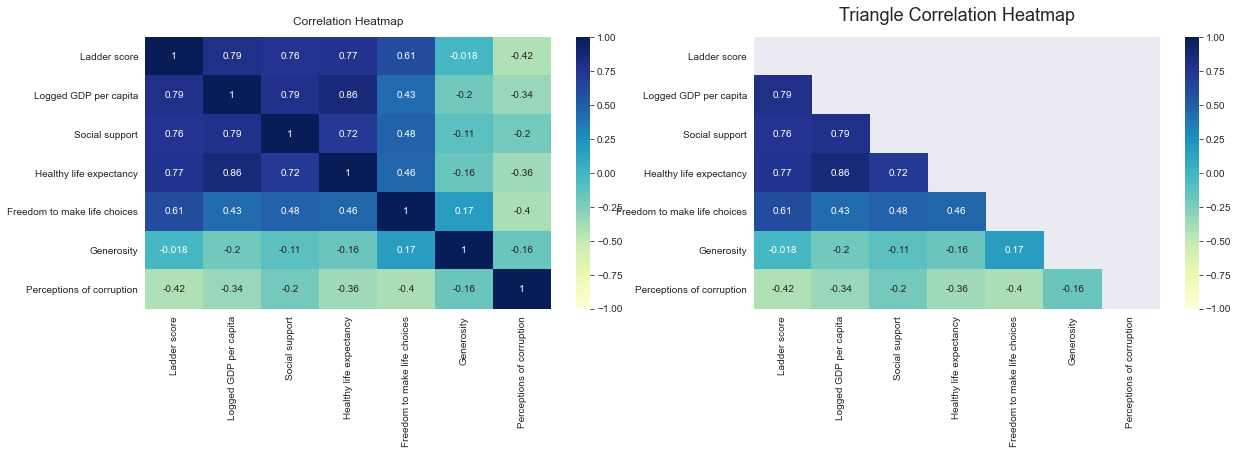

In [104]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
#heatmap corrolation
import seaborn as sns
heatmap = sns.heatmap(data.corr(), ax=axes[0] , vmin=-1, vmax=1, annot=True ,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap' , fontdict={'fontsize':12}, pad=12);
# triangle corrolation
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(),  vmin=-1, vmax=1, mask =mask , annot=True, cmap= "YlGnBu")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

># regplot

<AxesSubplot:xlabel='Ladder score', ylabel='Freedom to make life choices'>

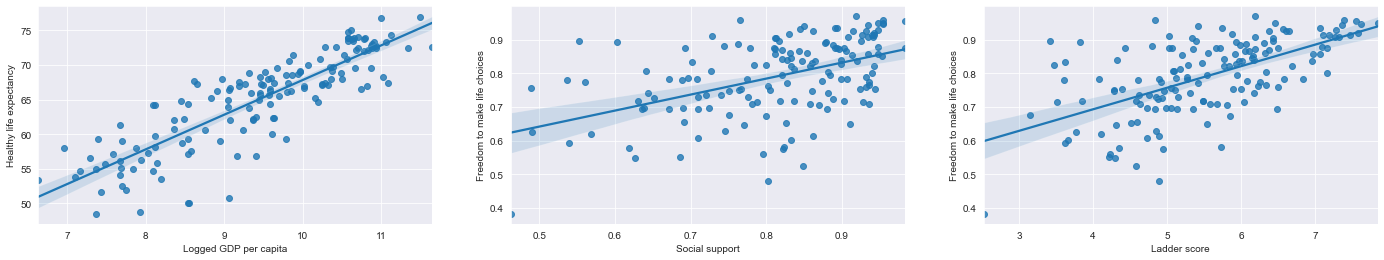

In [146]:
# regplot
fig, axes = plt.subplots(1,3, figsize=(24, 4))
sns.regplot(x = datafram['Logged GDP per capita'] , y = datafram['Healthy life expectancy'] ,ax=axes[0])c
sns.regplot(x = datafram['Social support'] , y = datafram['Freedom to make life choices'] ,ax=axes[1])
sns.regplot(x = datafram['Ladder score'] , y = datafram['Freedom to make life choices'] ,ax=axes[2] )

># relplot

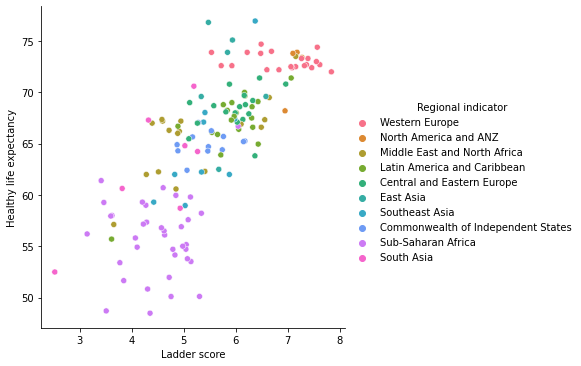

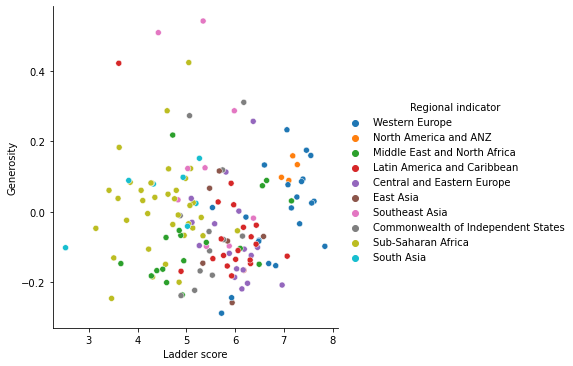

In [8]:
# re1plot
sns.relplot(data=data , x='Ladder score', y='Healthy life expectancy', hue='Regional indicator',palette = 'husl')
sns.relplot(data=data , x='Ladder score', y='Generosity', hue='Regional indicator', kind='scatter')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

># Statistical distribution

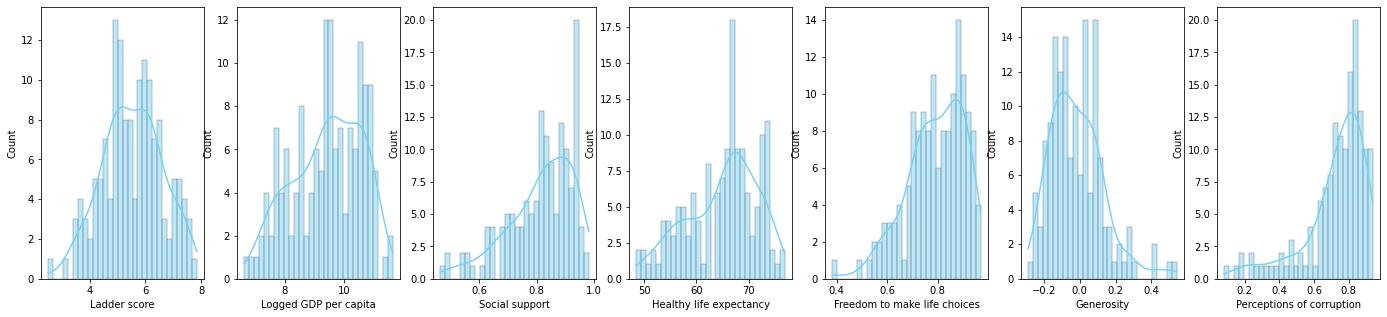

In [119]:
fig, axes = plt.subplots( 1,7 , figsize=(24, 5))
float_features_plot = [sns.histplot(data[n], ax=axes[i] , kde=True ,bins=30,color=['#72d2f9'],edgecolor='gray') for i , n in enumerate (float_features)] 

No handles with labels found to put in legend.


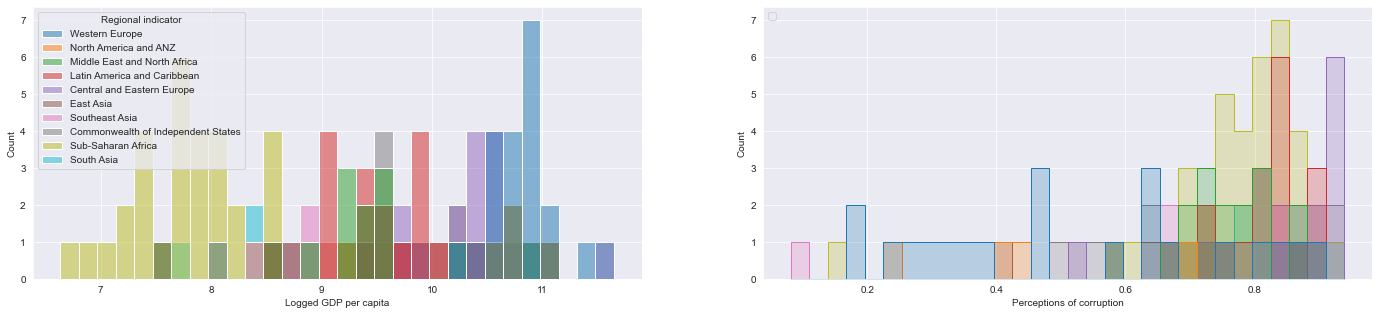

In [139]:
fig, axes = plt.subplots(1,2, figsize=(24, 5))
sns.set_style('darkgrid')
sns.histplot(data=data, x='Logged GDP per capita', bins=30, hue='Regional indicator', ax=axes[0], legend=True)
sns.histplot(data=data, x= 'Perceptions of corruption', bins=30, hue='Regional indicator', ax=axes[1], element='step' ,legend=True)
plt.legend(loc='upper left')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

># High and Low ladder score

<AxesSubplot:ylabel='Regional indicator'>

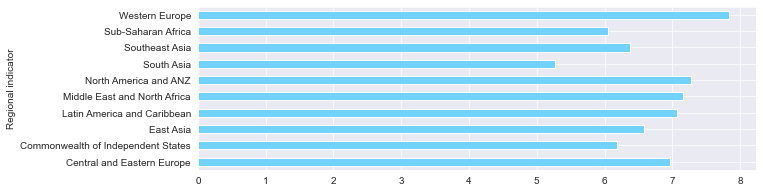

In [147]:
fig, axes = plt.subplots( figsize=(10, 3))
data.groupby('Regional indicator')['Ladder score'].max().plot(kind='barh',color=['#72d2f9'])

<AxesSubplot:xlabel='Country name'>

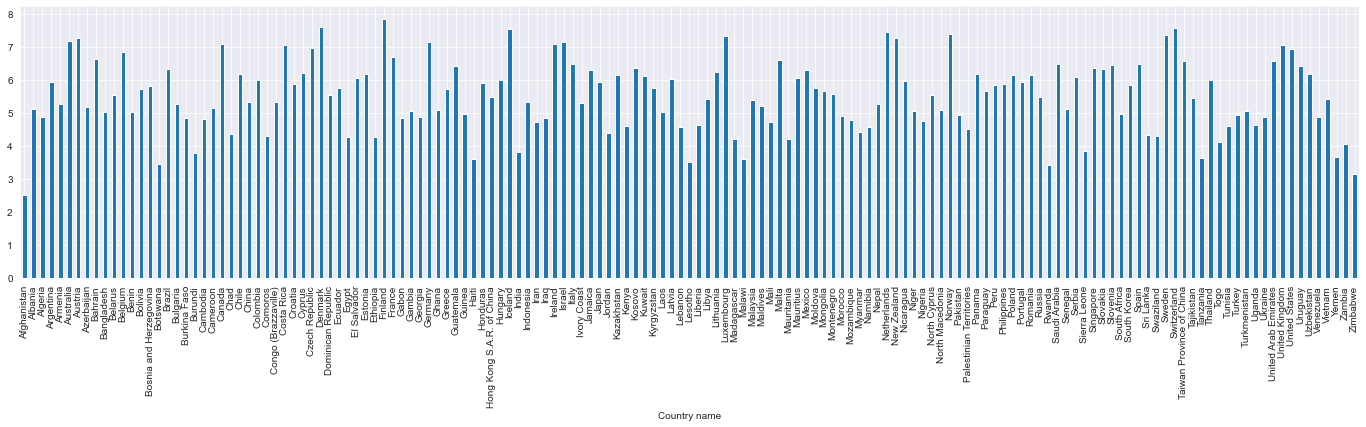

In [122]:
fig , axes = plt.subplots(figsize=(24, 5))
data.groupby('Country name')['Ladder score'].max().plot(kind='bar')

# sort_values "by"

In [167]:
low_ladder_score = data.sort_values(by='Ladder score')[['Regional indicator' ,'Country name']].iloc[0] ;
high_ladder_score = data.sort_values(by='Ladder score')[['Regional indicator' ,'Country name']].iloc[-1] 
df= pd.DataFrame([low_ladder_score , high_ladder_score] ,index=['low_ladder_score' , 'high_ladder_score']);df

,Regional indicator,Country name
low_ladder_score,South Asia,Afghanistan
high_ladder_score,Western Europe,Finland


In [241]:
sortvalues_ladder_score = data.sort_values(by='Ladder score', ignore_index=True)[['Regional indicator' ,'Country name']];sortvalues_ladder_score 
sortvalues_ladder_score.head()

,Regional indicator,Country name
0,South Asia,Afghanistan
1,Sub-Saharan Africa,Zimbabwe
2,Sub-Saharan Africa,Rwanda
3,Sub-Saharan Africa,Botswana
4,Sub-Saharan Africa,Lesotho


In [205]:
sortvalues_ladder_score = data.sort_values(by='Generosity', ignore_index=True)[['Regional indicator' ,'Country name']];sortvalues_ladder_score 
sortvalues_ladder_score.head(10)

,Regional indicator,Country name
0,Western Europe,Greece
1,East Asia,Japan
2,Sub-Saharan Africa,Botswana
3,Western Europe,Portugal
4,Commonwealth of Independent States,Georgia


In [242]:
sortvalues_ladder_score = data.sort_values(by='Logged GDP per capita', ignore_index=True)[[ 'Country name']];sortvalues_ladder_score 
sortvalues_ladder_score.head()

,Country name
0,Burundi
1,Malawi
2,Niger
3,Mozambique
4,Liberia


In [228]:
high_Social_support = data.sort_values(by='Social support', ignore_index=True)[[ 'Country name']].iloc[0];sortvalues_ladder_score 
low_Social_support = data.sort_values(by='Social support', ignore_index=True)[[ 'Country name']].iloc[-1];sortvalues_ladder_score 
df= pd.DataFrame([high_Social_support , low_Social_support] ,index=['high_Social_support' , 'low_Social_support']);df

,Country name
high_Social_support,Afghanistan
low_Social_support,Iceland


In [222]:
low_Freedom_to_make_life_choices = data.sort_values(by='Freedom to make life choices')[['Regional indicator' ,'Country name']].iloc[0] ;
high_Freedom_to_make_life_choices = data.sort_values(by='Freedom to make life choices')[['Regional indicator' ,'Country name']].iloc[-1] 
df= pd.DataFrame([low_Freedom_to_make_life_choices , high_Freedom_to_make_life_choices] ,index=['low_Freedom to make life choices' , 'high_Freedom to make life choices']);df

,Regional indicator,Country name
low_Freedom to make life choices,South Asia,Afghanistan
high_Freedom to make life choices,Commonwealth of Independent States,Uzbekistan


In [229]:
low_Perceptions_of_corruption = data.sort_values(by='Perceptions of corruption')[['Regional indicator' ,'Country name']].iloc[0] ;
high_Perceptions_of_corruption = data.sort_values(by='Perceptions of corruption')[['Regional indicator' ,'Country name']].iloc[-1] 
df= pd.DataFrame([low_Perceptions_of_corruption , high_Perceptions_of_corruption] ,index=['low_Perceptions_of_corruption' , 'high_Perceptions_of_corruption']);df


,Regional indicator,Country name
low_Perceptions_of_corruption,Southeast Asia,Singapore
high_Perceptions_of_corruption,Central and Eastern Europe,Croatia


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>### groupby

In [ ]:
for name , group in data.groupby(['Regional indicator', 'Country name']) :
    print(name)
    print(group)

In [283]:
c= data.groupby(['Regional indicator', 'Country name']).mean(['Perceptions of corruption']);c

Ladder score  \
Regional indicator         Country name                           
Central and Eastern Europe Albania                        5.117   
                           Bosnia and Herzegovina         5.813   
                           Bulgaria                       5.266   
                           Croatia                        5.882   
                           Czech Republic                 6.965   
...                                                         ...   
Western Europe             Portugal                       5.929   
                           Spain                          6.491   
                           Sweden                         7.363   
                           Switzerland                    7.571   
                           United Kingdom                 7.064   

                                                   Logged GDP per capita  \
Regional indicator         Country name                                    
Central and Eastern Europe Albania                                 9.520   
                           Bosnia and Herzegovina                  9.590   
                           Bulgaria                               10.016   
                           Croatia                                10.217   
                           Czech Republic                         10.556   
...                                                                  ...   
Western Europe             Portugal                               10.421   
                           Spain                                  10.571   
                           Sweden                                 10.867   
                           Switzerland                            11.117   
                           United Kingdom                         10.707   

                                                   Social support  \
Regional indicator         Country name                             
Central and Eastern Europe Albania                          0.697   
                           Bosnia and Herzegovina           0.870   
                           Bulgaria                         0.931   
                           Croatia                          0.924   
                           Czech Republic                   0.947   
...                                                           ...   
Western Europe             Portugal                         0.879   
                           Spain                            0.932   
                           Sweden                           0.934   
                           Switzerland                      0.942   
                           United Kingdom                   0.934   

                                                   Healthy life expectancy  \
Regional indicator         Country name                                      
Central and Eastern Europe Albania                                  68.999   
                           Bosnia and Herzegovina                   68.098   
                           Bulgaria                                 67.000   
                           Croatia                                  70.799   
                           Czech Republic                           70.807   
...                                                                    ...   
Western Europe             Portugal                                 72.600   
                           Spain                                    74.700   
                           Sweden                                   72.700   
                           Switzerland                              74.400   
                           United Kingdom                           72.500   

                                                   Freedom to make life choices  \
Regional indicator         Country name                                           
Central and Eastern Europe Albania                                        0.785   
                           B

In [259]:
data.groupby(['Regional indicator', 'Country name']).mean(['Logged GDP per capita'])

Ladder score  \
Regional indicator         Country name                           
Central and Eastern Europe Albania                        5.117   
                           Bosnia and Herzegovina         5.813   
                           Bulgaria                       5.266   
                           Croatia                        5.882   
                           Czech Republic                 6.965   
...                                                         ...   
Western Europe             Portugal                       5.929   
                           Spain                          6.491   
                           Sweden                         7.363   
                           Switzerland                    7.571   
                           United Kingdom                 7.064   

                                                   Logged GDP per capita  \
Regional indicator         Country name                                    
Central and Eastern Europe Albania                                 9.520   
                           Bosnia and Herzegovina                  9.590   
                           Bulgaria                               10.016   
                           Croatia                                10.217   
                           Czech Republic                         10.556   
...                                                                  ...   
Western Europe             Portugal                               10.421   
                           Spain                                  10.571   
                           Sweden                                 10.867   
                           Switzerland                            11.117   
                           United Kingdom                         10.707   

                                                   Social support  \
Regional indicator         Country name                             
Central and Eastern Europe Albania                          0.697   
                           Bosnia and Herzegovina           0.870   
                           Bulgaria                         0.931   
                           Croatia                          0.924   
                           Czech Republic                   0.947   
...                                                           ...   
Western Europe             Portugal                         0.879   
                           Spain                            0.932   
                           Sweden                           0.934   
                           Switzerland                      0.942   
                           United Kingdom                   0.934   

                                                   Healthy life expectancy  \
Regional indicator         Country name                                      
Central and Eastern Europe Albania                                  68.999   
                           Bosnia and Herzegovina                   68.098   
                           Bulgaria                                 67.000   
                           Croatia                                  70.799   
                           Czech Republic                           70.807   
...                                                                    ...   
Western Europe             Portugal                                 72.600   
                           Spain                                    74.700   
                           Sweden                                   72.700   
                           Switzerland                              74.400   
                           United Kingdom                           72.500   

                                                   Freedom to make life choices  \
Regional indicator         Country name                                           
Central and Eastern Europe Albania                                        0.785   
                           B

In [9]:
a = data.groupby(['Regional indicator', 'Country name']).mean(['Logged GDP per capita']).reset_index();a

,Regional indicator,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Central and Eastern Europe,Albania,5.117,9.520,0.697,68.999,0.785,-0.030,0.901
1,Central and Eastern Europe,Bosnia and Herzegovina,5.813,9.590,0.870,68.098,0.706,0.113,0.931
2,Central and Eastern Europe,Bulgaria,5.266,10.016,0.931,67.000,0.788,-0.096,0.932
3,Central and Eastern Europe,Croatia,5.882,10.217,0.924,70.799,0.754,-0.118,0.939
4,Central and Eastern Europe,Czech Republic,6.965,10.556,0.947,70.807,0.858,-0.208,0.868
...,...,...,...,...,...,...,...,...,...
144,Western Europe,Portugal,5.929,10.421,0.879,72.600,0.892,-0.244,0.887
145,Western Europe,Spain,6.491,10.571,0.932,74.700,0.761,-0.081,0.745
146,Western Europe,Sweden,7.363,10.867,0.934,72.700,0.945,0.086,0.237
147,Western Europe,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292


<AxesSubplot:>

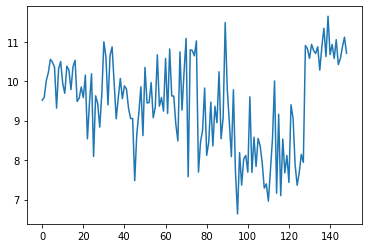

In [10]:
a['Logged GDP per capita'].plot()

In [272]:
data.groupby(['Regional indicator', 'Country name']).mean(['Healthy life expectancy'])

Ladder score  \
Regional indicator         Country name                           
Central and Eastern Europe Albania                        5.117   
                           Bosnia and Herzegovina         5.813   
                           Bulgaria                       5.266   
                           Croatia                        5.882   
                           Czech Republic                 6.965   
...                                                         ...   
Western Europe             Portugal                       5.929   
                           Spain                          6.491   
                           Sweden                         7.363   
                           Switzerland                    7.571   
                           United Kingdom                 7.064   

                                                   Logged GDP per capita  \
Regional indicator         Country name                                    
Central and Eastern Europe Albania                                 9.520   
                           Bosnia and Herzegovina                  9.590   
                           Bulgaria                               10.016   
                           Croatia                                10.217   
                           Czech Republic                         10.556   
...                                                                  ...   
Western Europe             Portugal                               10.421   
                           Spain                                  10.571   
                           Sweden                                 10.867   
                           Switzerland                            11.117   
                           United Kingdom                         10.707   

                                                   Social support  \
Regional indicator         Country name                             
Central and Eastern Europe Albania                          0.697   
                           Bosnia and Herzegovina           0.870   
                           Bulgaria                         0.931   
                           Croatia                          0.924   
                           Czech Republic                   0.947   
...                                                           ...   
Western Europe             Portugal                         0.879   
                           Spain                            0.932   
                           Sweden                           0.934   
                           Switzerland                      0.942   
                           United Kingdom                   0.934   

                                                   Healthy life expectancy  \
Regional indicator         Country name                                      
Central and Eastern Europe Albania                                  68.999   
                           Bosnia and Herzegovina                   68.098   
                           Bulgaria                                 67.000   
                           Croatia                                  70.799   
                           Czech Republic                           70.807   
...                                                                    ...   
Western Europe             Portugal                                 72.600   
                           Spain                                    74.700   
                           Sweden                                   72.700   
                           Switzerland                              74.400   
                           United Kingdom                           72.500   

                                                   Freedom to make life choices  \
Regional indicator         Country name                                           
Central and Eastern Europe Albania                                        0.785   
                           B

<AxesSubplot:xlabel='Regional indicator'>

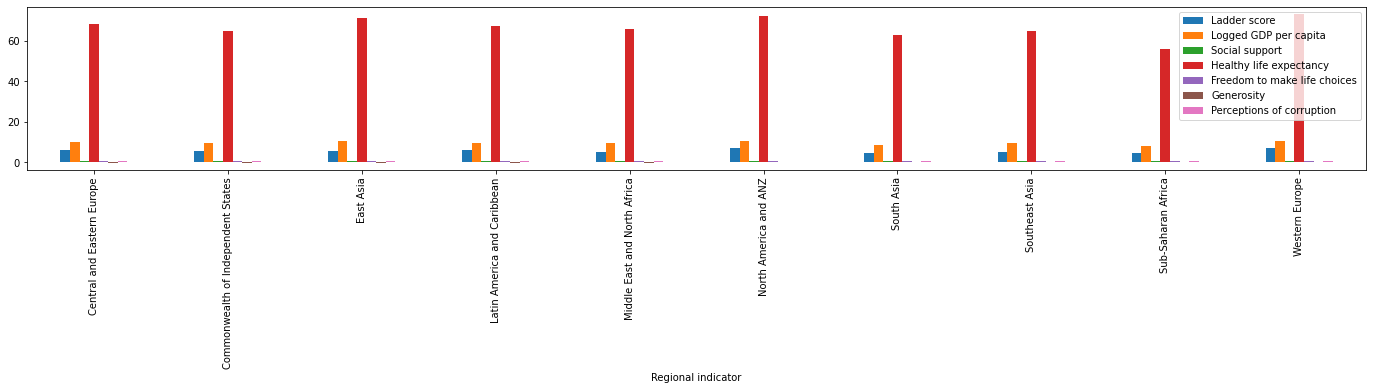

In [12]:
fig, axes = plt.subplots( figsize=(24, 3))
df= data.groupby('Regional indicator');df.mean().plot(kind='bar' ,ax=axes)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# convert Country name and Regional indicator columns to numerical values

In [2]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
#data_cat_to_numerical

data_cat = data.iloc[: , [0 , 1]]
enc = OrdinalEncoder().fit(data_cat).transform(data_cat)
data_frame_numerical = pd.DataFrame(enc)
data_frame_num_rename = data_frame_numerical.rename(columns= {0 : 'Country name', 1: 'Regional indicator' })  

#concat
data_num = data.iloc[: , 2:]
data_cat = data.iloc[: , [0 , 1]]
datafram = pd.concat([data_num , data_frame_num_rename] , axis=1 ); datafram.head(5)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country name,Regional indicator
0,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,40.0,9.0
1,7.620,10.933,0.954,72.7,0.946,0.030,0.179,33.0,9.0
2,7.571,11.117,0.942,74.4,0.919,0.025,0.292,128.0,9.0
3,7.554,10.878,0.983,73.0,0.955,0.160,0.673,54.0,9.0
4,7.464,10.932,0.942,72.4,0.913,0.175,0.338,96.0,9.0


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Algorithm KNN , scaling the data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#to normalize befor use Algoritm
min_of_data =  X_train.min(axis=0)
range_of_data = (X_train-min_of_data).max(axis=0)
X_train_s = (X_train - min_of_data)/range_of_data
X_test_s = (X_test - min_of_data)/range_of_data

knn1_Regresion = KNeighborsRegressor(n_neighbors=10).fit(X_train_s, y_train)
print("Train score : " , knn1_Regresion.score(X_train_s, y_train))
print( "Test score : " , knn1_Regresion.score(X_test_s, y_test))


Train score :  0.7629159140666777
Test score :  0.7317581529636321


# Algorithm KNN _ |  not scaling the data | 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# #to normalize befor use Algoritm
# min_of_data =  X_train.min(axis=0)
# range_of_data = (X_train-min_of_data).max(axis=0)
# X_train_s = (X_train - min_of_data)/range_of_data
# X_test_s = (X_test - min_of_data)/range_of_data

knn_Regresion = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)
print("Train score : " , knn_Regresion.score(X_train, y_train))
print( "Test score : " , knn_Regresion.score(X_test, y_test))

Train score :  0.2671387896152422
Test score :  0.14445173065201866


----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Ridge => | alpha = 10 , alpha = 0.1 |

In [68]:
from sklearn.linear_model import Ridge

X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Linear_ridge = Ridge(alpha=0.6).fit(X_train, y_train)
print(Linear_ridge.score(X_train, y_train))
print(Linear_ridge.score(X_test, y_test))
print('\n')
Linear_ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(Linear_ridge10.score(X_train, y_train))
print(Linear_ridge10.score(X_test, y_test))

0.7599525643613327
0.7424191441144875


0.6833520859990816
0.6745318586762693


In [69]:
Linear_ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(Linear_ridge10.score(X_train, y_train))
print(Linear_ridge10.score(X_test, y_test))

0.6833520859990816
0.6745318586762693


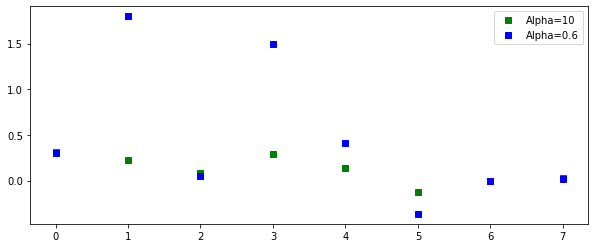

In [70]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(Linear_ridge10.coef_, 's', c='g', label="Alpha=10")
ax.plot(Linear_ridge.coef_, 's', c='blue', label="Alpha=0.6")
ax.legend()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# lasso => | alpha = 0.0001 |

In [71]:
from sklearn.linear_model import Lasso

X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

l_lasso00001 = Lasso(alpha=0.0001, max_iter=1e5).fit(X_train, y_train)
print("Train Accuracy: ", l_lasso00001.score(X_train, y_train))
print("Test Accuracy: ", l_lasso00001.score(X_test, y_test))
print("Number of features : ", np.sum(l_lasso00001.coef_ != 0))


Train Accuracy:  0.7795736178453826
Test Accuracy:  0.6874788107676061
Number of features :  8


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# DecisionTree 

In [72]:
from sklearn.tree import DecisionTreeRegressor
``
X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Tree_Regressor = DecisionTreeRegressor(ccp_alpha=0.09, random_state=0).fit(X_train, y_train)
print("Train Accuracy: ", Tree_Regressor .score(X_train, y_train))
print("Test Accuracy: ", Tree_Regressor .score(X_test, y_test))

Train Accuracy:  0.7504396312364738
Test Accuracy:  0.6492907146371887


>### features importances == "Logged GDP per capita" 	"Social support"  "Healthy life expectancy"

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

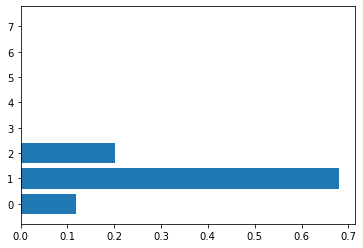

In [89]:
Tree_Regressor.feature_importances_
plt.barh(range(X.shape[1]), Tree_Regressor.feature_importances_)
datafram.columns.drop(['Country name' , 'Regional indicator', 'Ladder score'])


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest Regressor => |  criterion='mse' : to change test accuracy from 79 to 83 |


In [8]:
from sklearn.ensemble import RandomForestRegressor
X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

random_forest_Regressor = RandomForestRegressor(n_estimators=200 , criterion='mse',random_state=2).fit(X_train, y_train)
print("Train Accuracy: ", random_forest_Regressor .score(X_train, y_train))
print("Test Accuracy: ", random_forest_Regressor .score(X_test, y_test))

Train Accuracy:  0.9675823311392874
Test Accuracy:  0.8337337115691816


<AxesSubplot:>

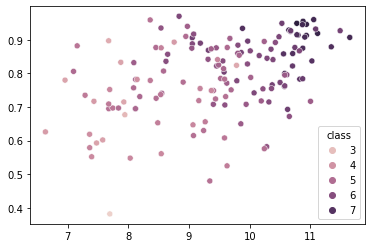

In [9]:
df = pd.DataFrame(X)
df['class'] = y
sns.scatterplot(data=df, x=X[:,0], y=X[:,3], hue='class')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Gradient Boosting Regressor | max_features : ??|

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

G_Boosting_Regressor = GradientBoostingRegressor(learning_rate=0.05, n_estimators=100 , random_state=1).fit(X_train, y_train)
print("Train Accuracy : ", G_Boosting_Regressor.score(X_train, y_train))
print("Test Accuracy : ", G_Boosting_Regressor.score(X_test, y_test))

Train Accuracy :  0.9722117096718579
Test Accuracy :  0.8202431124630452


([<matplotlib.axis.YTick at 0xf0d0280>,
 [Text(0, 0, 'Logged GDP per capita'),
  Text(0, 1, 'Social support'),
  Text(0, 2, 'Healthy life expectancy'),
  Text(0, 3, 'Freedom to make life choices'),
  Text(0, 4, 'Generosity'),
  Text(0, 5, 'Perceptions of corruption')])

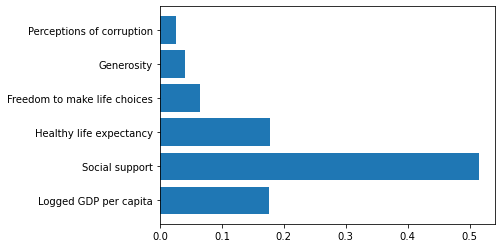

In [269]:
G_Boosting_Regressor.feature_importances_
plt.barh(range(X.shape[1]), G_Boosting_Regressor.feature_importances_)
b = data.columns.drop(['Country name' , 'Regional indicator', 'Ladder score'])
plt.yticks(range(X.shape[1]), b)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# LinearSVR

In [82]:
from sklearn.svm import LinearSVR
X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

LinearSVR = LinearSVR( C= 2.0, max_iter=1000).fit(X_train, y_train)
print("Train Accuracy : ",LinearSVR.score(X_train, y_train))
print("Test Accuracy : ", LinearSVR.score(X_test, y_test))

Train Accuracy :  0.6721205977091671
Test Accuracy :  0.7196923877434598


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# sklearn.svm.SVR :  | scaling the data |

In [83]:
from sklearn.svm import SVR
X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#to normalize befor use Algoritm
min_of_data =  X_train.min(axis=0)
range_of_data = (X_train-min_of_data).max(axis=0)
X_train_s = (X_train - min_of_data)/range_of_data
X_test_s = (X_test - min_of_data)/range_of_data


SVR = SVR(C=9.0 , degree=3 ,kernel='rbf').fit(X_train_s, y_train)
print("Train score : " , SVR.score(X_train_s, y_train))
print( "Test score : " , SVR.score(X_test_s, y_test))

Train score :  0.9543392595713304
Test score :  0.7254720573942346


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# neural_network.MLPRegressor

In [98]:
from sklearn.neural_network import MLPRegressor
X = np.array(datafram.iloc[: , 1:])
y = np.array(datafram['Ladder score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

min_of_data =  X_train.min(axis=0)
range_of_data = (X_train-min_of_data).max(axis=0)
X_train_s = (X_train - min_of_data)/range_of_data
X_test_s = (X_test - min_of_data)/range_of_data

MLPRegressor = MLPRegressor(hidden_layer_sizes=[1000, 1000], random_state=0,  alpha=0.07).fit(X_train_s, y_train)
print("Train score : " , MLPRegressor.score(X_train_s, y_train))
print( "Test score : " , MLPRegressor.score(X_test_s, y_test))

Train score :  0.8987472398252938
Test score :  0.7267691765548618


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


>### plot all of the coefs_

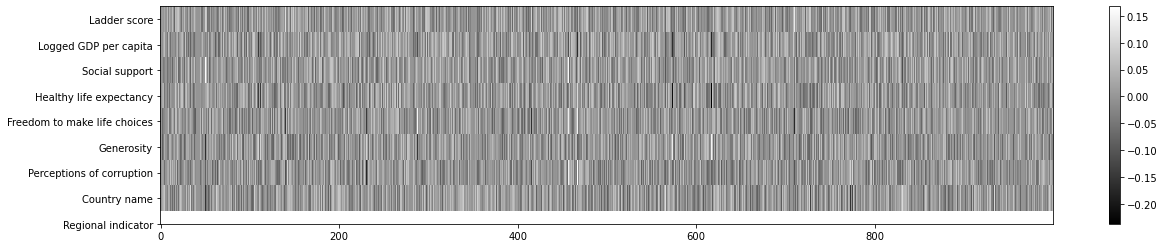

In [52]:
# we have 8 features and 1000 node
fig , ax =plt.subplots(figsize=(20,4))
ax1=ax.imshow(MLPRegressor.coefs_[0] , aspect='auto', cmap=plt.cm.gray, interpolation ='nearest' )
ax.set_yticks(range(len(datafram.columns)))
ax.set_yticklabels(datafram.columns)
fig.colorbar(ax1)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

# result :  random forest Regressor has high test accuracy 


In [92]:
print('neural_network.MLPRegressor')
print("Train score : " , MLPRegressor.score(X_train_s, y_train))
print( "Test score : " , MLPRegressor.score(X_test_s, y_test))
print('\n')

print('sklearn.svm.SVR')
print("Train score : " , SVR.score(X_train_s, y_train))
print( "Test score : " , SVR.score(X_test_s, y_test))
print('\n')

print('LinearSVR')
print("Train Accuracy : ",LinearSVR.score(X_train, y_train))
print("Test Accuracy : ", LinearSVR.score(X_test, y_test))
print('\n')

print('G_Boosting_Regressor')
print("Train Accuracy : ", G_Boosting_Regressor.score(X_train, y_train))
print("Test Accuracy : ", G_Boosting_Regressor.score(X_test, y_test))
print('\n')

print('random_forest_Regressor')
print("Train Accuracy: ", random_forest_Regressor .score(X_train, y_train))
print("Test Accuracy: ", random_forest_Regressor .score(X_test, y_test))
print('\n')

print('Tree_Regressor')
print("Train Accuracy: ", Tree_Regressor .score(X_train, y_train))
print("Test Accuracy: ", Tree_Regressor .score(X_test, y_test))
print('\n')

print('lasso')
print("Train Accuracy: ", l_lasso00001.score(X_train, y_train))
print("Test Accuracy: ", l_lasso00001.score(X_test, y_test))
print('\n')

print('Linear_ridge')
print("Train Accuracy: " ,Linear_ridge.score(X_train, y_train))
print("Test Accuracy: ",Linear_ridge.score(X_test, y_test))
print('\n')

print('knn_Regresion => not scaling data')
print("Train score : " , knn_Regresion.score(X_train, y_train))
print( "Test score : " , knn_Regresion.score(X_test, y_test))
print('\n')

print('knn_Regresion =>  scaling data')
print("Train score : " , knn1_Regresion.score(X_train_s, y_train))
print( "Test score : " , knn1_Regresion.score(X_test_s, y_test))

neural_network.MLPRegressor
Train score :  0.8987472398252938
Test score :  0.7267691765548618


sklearn.svm.SVR
Train score :  0.9543392595713304
Test score :  0.7254720573942346


LinearSVR
Train Accuracy :  0.6721205977091671
Test Accuracy :  0.7196923877434598


G_Boosting_Regressor
Train Accuracy :  0.9722117096718579
Test Accuracy :  0.8202431124630452


random_forest_Regressor
Train Accuracy:  0.9675823311392874
Test Accuracy:  0.8337337115691816


Tree_Regressor
Train Accuracy:  0.7504396312364738
Test Accuracy:  0.6492907146371887


lasso
Train Accuracy:  0.7795736178453826
Test Accuracy:  0.6874788107676061


Linear_ridge
Train Accuracy:  0.7599525643613327
Test Accuracy:  0.7424191441144875


knn_Regresion => not scaling data
Train score :  0.2671387896152422
Test score :  0.14445173065201866


knn_Regresion =>  scaling data
Train score :  0.7629159140666777
Test score :  0.7317581529636321


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------